# 1 - Define the problem / Questions

# 2. Data Collections -

# 3 - Data Cleaning  -
- Handle missing values

- Identify and remove duplicates

- handle outliers

- Transform the data into suitable format

# 4- EDA - Exploratory Data Analysis.

# 5- Data Visualization -

# 6 - Analyze the insights & Report


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
#initial data inspection

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
#As we seen , the data contain some missing values.
#so lets check the exact number

In [7]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


#insights

- age - 177 missing values - should be imputed based on pclass or sex - replace by mean or median

- embarked - 2 missing values - can be filled with mode

- deck - massive missing values - better to drop this column


# .fillna()

# .dropna - .dop()

In [8]:
#fill with median age based on pclass & sex

In [9]:
titanic['age'] =titanic.groupby(['pclass', 'sex'])['age'].transform(lambda x : x.fillna(x.median()))

In [10]:
titanic['age'].isnull().sum()

0

In [11]:
#replace embark with mode

In [12]:
titanic['embarked'].mode()[0]

'S'

In [13]:
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace = True)
#inplace = True is for permenent changes

<ipython-input-13-ad8b6e37aa77>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace = True)


In [14]:
titanic['embarked'].isnull().sum()

0

In [15]:
titanic.drop(columns=['deck'], inplace= True)

In [16]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [17]:
titanic.drop(columns=['who', 'embark_town', 'alive', 'adult_male'] , inplace= True)

In [18]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
alone,0


In [19]:
titanic.shape

(891, 10)

After dropping unwanted columns the titanic dataset now has 891 rows describe the 891 passenger details and 10 columns which shows the passenger features.

In [20]:
#lets check for statistical summery of the data -

In [21]:
titanic.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,646,491,537
mean,0.383838,2.308642,NaN,29.112424,0.523008,0.381594,32.204208,NaN,NaN,NaN
std,0.486592,0.836071,NaN,13.304424,1.102743,0.806057,49.693429,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,21.500000,0.000000,0.000000,7.910400,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,26.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,36.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN


 - survival rate only 38% while 62% did not survived

- half of the passenger were in third class

- most passenger were young adult - median age = 26 year

- must be outlier in age shown 80 year old also

- median fare 14.45 but max was 512.33 - it also may contain outliers

-most passenger travel alone

- most passenger embarked from 'S'

- most passenger class is Third class

In [22]:
titanic.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,True
887,False
888,False
889,False


In [23]:
titanic.duplicated().sum()

118

In [24]:
titanic.drop_duplicates(inplace= True)

In [25]:
titanic.duplicated().sum()

0

In [26]:
titanic.shape

(773, 10)

In [27]:
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone
0,0,3,male,22.0,1,0,7.25,S,Third,False


# EDA

In [28]:
#1 - What is the overall distribution of passengers across different classes (Pclass)?

In [29]:
titanic['pclass'].unique()

array([3, 1, 2])

In [32]:
pclass_count = titanic['pclass'].value_counts().sort_index()

In [33]:
pclass_count

,count
pclass,
1,209
2,164
3,400


In [34]:
pclass_count.index

Index([1, 2, 3], dtype='int64', name='pclass')

In [35]:
pclass_count.values

array([209, 164, 400])

<ipython-input-36-2eac979f6681>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = pclass_count.index, y = pclass_count.values ,


Text(0.5, 1.0, 'Distribution of passenger accross different Pclass')

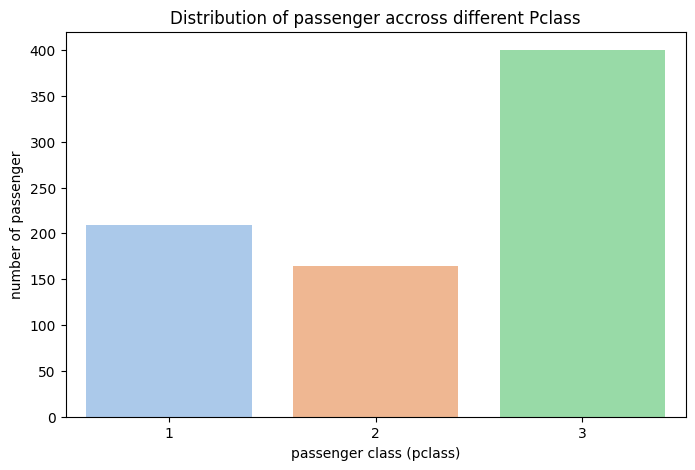

In [36]:
plt.figure(figsize= (8,5))
sns.barplot(x = pclass_count.index, y = pclass_count.values ,
            palette = 'pastel')
plt.xlabel("passenger class (pclass)")
plt.ylabel("number of passenger")
plt.title("Distribution of passenger accross different Pclass")

Insights from pclass distribution

- Majority of the passenger traveled in pclass3, indicating it was the most affordable and popular

- Pclass 1 had the least number of passenger , suggesting that fewer people could afford luxury travel

- pclass2 - had moderate number of passenger showing a middle class passenger presence on the titanic.

In [37]:
#2 - How is the age of passengers distributed?

Text(0.5, 1.0, 'Distribution of Passenger Ages on Titanic ')

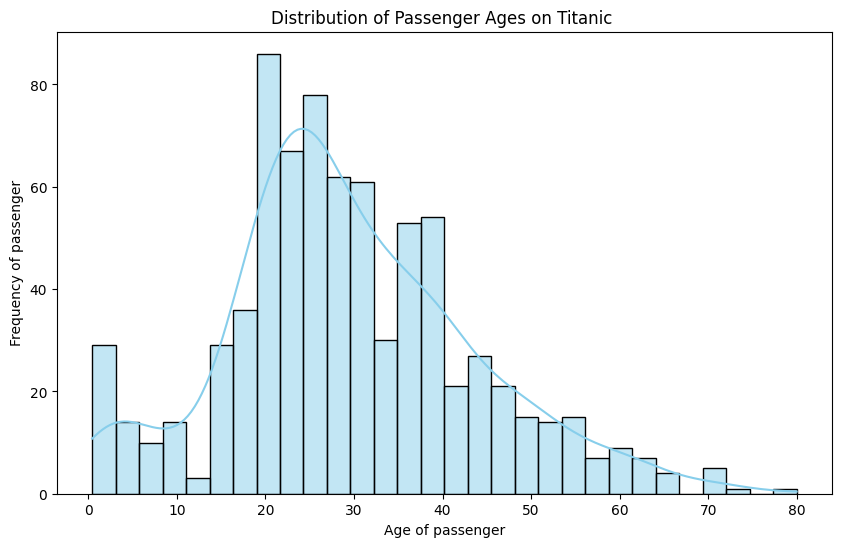

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(data = titanic , x = 'age' , bins = 30,
             kde= True, color ='skyblue')
plt.xlabel("Age of passenger")
plt.ylabel("Frequency of passenger")
plt.title("Distribution of Passenger Ages on Titanic ")

Insights from age distribution

- The peak age group is 20-30 year . indicating many young adults traveled.

- there are fewer childresn (age < 10) and elderly (age > 60)  on board

- the age distributioin has a long tail on the right, indicating some passengers were much older (May be outlier) , not supposed to be board.

In [42]:
#3-What is the distribution of passengers based on Sex?

In [43]:
titanic['sex'].unique()

array(['male', 'female'], dtype=object)

In [44]:
gender_count = titanic['sex'].value_counts()

In [45]:
gender_count

,count
sex,
male,482
female,291


In [46]:
gender_count.index

Index(['male', 'female'], dtype='object', name='sex')

In [47]:
gender_count.values

array([482, 291])

<ipython-input-49-3b8cd466edeb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = gender_count.index, y = gender_count.values ,


Text(0.5, 1.0, 'Distribution of Passenger based on gender')

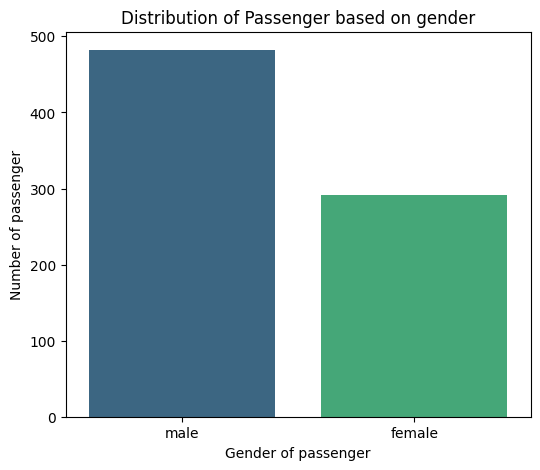

In [49]:
plt.figure(figsize=(6,5))
sns.barplot(x = gender_count.index, y = gender_count.values ,
            palette= 'viridis' )
plt.xlabel("Gender of passenger")
plt.ylabel("Number of passenger")
plt.title("Distribution of Passenger based on gender")

Insights from Gender Distribution

- The dataset shows more Male Passenger than Females

- Since the titanic was a mix emigrants , workers, healthly workers, men might have travled more for work and opportunity.

In [50]:
#4 How many passengers embarked from each port (Embarked)?

In [51]:
titanic['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [52]:
# S - Southampton , C - Cherbourg , Q - Queenstown

In [53]:
embarked_count = titanic['embarked'].value_counts()

In [54]:
embarked_count

,count
embarked,
S,562
C,153
Q,58


<ipython-input-55-221eba30399c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=embarked_count.index, y =embarked_count.values,


Text(0.5, 1.0, 'Number of passenger embarked from each port')

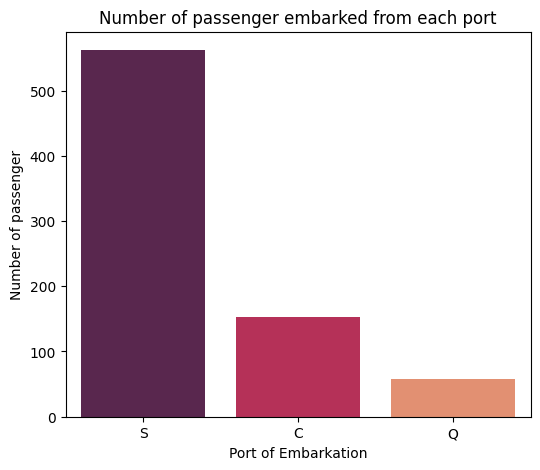

In [55]:
plt.figure(figsize= (6,5))
sns.barplot(x=embarked_count.index, y =embarked_count.values,
            palette= 'rocket')
plt.xlabel("Port of Embarkation")
plt.ylabel("Number of passenger")
plt.title("Number of passenger embarked from each port")

Insights from Embarked Distribution

- Manjority of passenger embarked from S - Southampton

- Moderate passenger embarked from C - Cherbourg

- Q - Queenstown had least number of passenger

In [56]:
# What is the survival rate overall, and how does it vary by Pclass?

In [59]:
overall_survival_rate = titanic['survived'].mean()*100

In [60]:
overall_survival_rate

41.52652005174644

In [61]:
survival_by_pclass = titanic.groupby('pclass')['survived'].mean()*100

In [62]:
survival_by_pclass

,survived
pclass,
1,64.114833
2,50.609756
3,26.000000


In [63]:
survival_by_pclass.index

Index([1, 2, 3], dtype='int64', name='pclass')

In [64]:
survival_by_pclass.values

array([64.11483254, 50.6097561 , 26.        ])

<ipython-input-65-b16b343fb9f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_pclass.index , y = survival_by_pclass.values,


Text(0.5, 1.0, 'Survival Rate by Pclass')

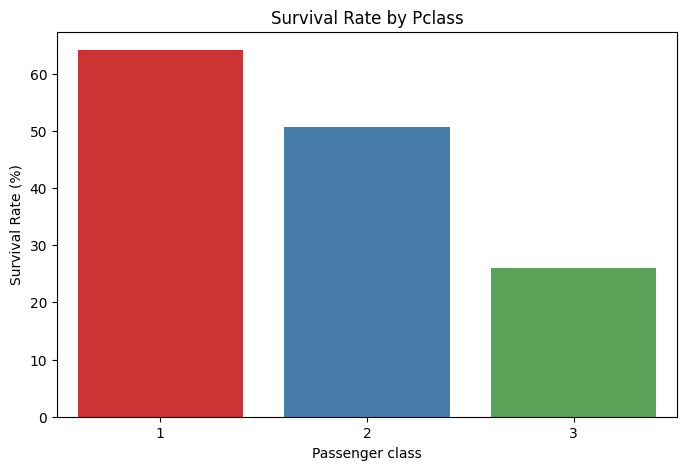

In [65]:
plt.figure(figsize=(8,5))
sns.barplot(x=survival_by_pclass.index , y = survival_by_pclass.values,
            palette= 'Set1')
plt.xlabel("Passenger class")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Pclass")

Insighta on Surviaval rate by Pclass

- Only 41% of passenger survived, indicating a high fatality rate

- 1st class had highest survival rate ~ 64% ,passenger had better access to lifeboats and safety

-Moderate survival rate in 2nd class ~50% , some middle class passengers survived byt not as many as pclass1

-lowest survival rate in 3rd class - 26% , passenger due to fewer safety resourses.